## 1-D FDTD in free space:

### One Source

In [4]:
### DEFINITIONS AND INITIALIZATION ###

#number of cells
KE = 200;

#center of the problem space
kc = div((KE + 1), 2);

#center of the incident pulse
t0 = 40;

#width of the incident pulse
spread = 12;

T = 2; NSTEPS = 1;
ex = zeros(KE);
hy = zeros(KE);
#x = collect(1:10);

In [5]:
println("Enter number of steps: ");
NSTEPS = parse(UInt64,readline(STDIN));

Enter number of steps: 
STDIN> 100


In [6]:
#while NSTEPS > 0
#    NSTEPS = NSTEPS - 1;
    T = 0;
    #main FDTD loop
    for n = 1 : NSTEPS
        T = T + 1;
        
        # calculating Ex field
        for k = 2 : KE 
            ex[k] = ex[k] + 0.5*( hy[k-1] - hy[k]);
        end
        
        #putting Gaussian pulse in the middle
        pulse = exp(-0.5*(abs2((t0-T)/spread)));
        ex[kc] = pulse;
        
        #calculating Hy field
        for k = 1 : KE-1
            hy[k] = hy[k] + 0.5*(ex[k] - ex[k+1]);
        end 
    end
print("Timesteps: "); print(T);
#end

Timesteps: 100

INFO: Building Rmath


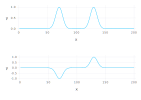

In [7]:
Pkg.build("Gadfly")
using Gadfly
vstack(Gadfly.plot(x=collect(1:KE), y = ex, Geom.line), Gadfly.plot(x=collect(1:KE), y = hy, Geom.line))

#### Note
At the point where the pulse hits the end of the array, we have a unique boundary condition imposed because of this method, where the left end of the array has ex = 0 and right end of the array has hy = 0. To enable interleaving we calculate Ex first assuming Hy = 0 everywhere. The source is added after Ex is calculated, the first time. Subsequent iterations give the Ex and Hy at later points of time, not necessarily accurate due to the cascaded interleaving.

### Two sources

In [8]:
T = 0; NSTEPS = 50; ex = zeros(KE); hy = zeros(KE);
    #main FDTD loop
    for n = 1 : NSTEPS
        T = T + 1;
        
        # calculating Ex field
        for k = 2 : KE 
            ex[k] = ex[k] + 0.5*( hy[k-1] - hy[k]);
        end
        
        # Gaussian pulse in middle +- 20
        pulse = exp(-0.5*(abs2((t0-T)/spread)));
        ex[kc-20] = pulse; ex[kc+20] = pulse;
        
        #calculating Hy field
        for k = 1 : KE-1
            hy[k] = hy[k] + 0.5*(ex[k] - ex[k+1]);
        end 
    end
print("Timesteps: "); print(T);

Timesteps: 50

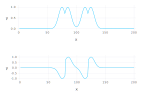

In [9]:
using Gadfly
vstack(plot(x=collect(1:KE), y = ex, Geom.line), plot(x=collect(1:KE), y = hy, Geom.line))

### Source in Hy

In [10]:
T = 0; NSTEPS = 100; ex = zeros(KE); hy = zeros(KE);
    #main FDTD loop
    for n = 1 : NSTEPS
        T = T + 1;
        
        #calculating Hy field
        for k = 1 : KE-1
            hy[k] = hy[k] + 0.5*(ex[k] - ex[k+1]);
        end
    
        # Gaussian pulse in middle +- 20
        pulse = exp(-0.5*(abs2((t0-T)/spread)));
        hy[kc] = pulse; #ex[kc+20] = pulse;
    
        # calculating Ex field
        for k = 2 : KE 
            ex[k] = ex[k] + 0.5*( hy[k-1] - hy[k]);
        end
        
    end
print("Timesteps: "); print(T);

Timesteps: 100

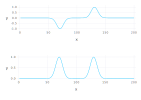

In [11]:
using Gadfly
vstack(plot(x=collect(1:KE), y = ex, Geom.line), plot(x=collect(1:KE), y = hy, Geom.line))

### Absorbing boundary condition

In [70]:
ex_low_m1 = 0; ex_low_m2 = 0; ex_high_m1 = 0; ex_high_m2 = 0; ex = zeros(KE); hy = zeros(KE);
#main FDTD loop
T = 0; NSTEPS = 250; 
for n = 1:NSTEPS
    T = T + 1;
    for k = 2 : KE
        ex[k] = ex[k] +0.5*(hy[k-1] - hy[k]);
    end
    pulse = exp(-0.5*(abs2((t0-T)/spread)));
    ex[kc] = ex[kc] + pulse;
    
    #Absorbing boundary condidtions:
    ex[1] = ex_low_m2;
    ex_low_m2 = ex_low_m1;
    ex_low_m1 = ex[2];
    ex[KE] = ex_high_m2;
    ex_high_m2 = ex_high_m1;
    ex_high_m1 = ex[KE-1];
    
    for k = 1:KE-1
        hy[k] = hy[k] + 0.5 * ( ex[k] - ex[k+1]);
    end
end

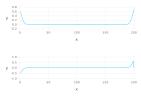

In [71]:
using Gadfly
vstack(plot(x=collect(1:KE), y = ex, Geom.line), plot(x=collect(1:KE), y = hy, Geom.line))

### Dielectric medium

In [114]:
println("Enter dielectric constant: ");
epsilon = parse(Float64,readline(STDIN));

Enter dielectric constant: 
STDIN> 1.5


In [115]:
ex_low_m1 = 0; ex_low_m2 = 0; ex_high_m1 = 0; ex_high_m2 = 0; ex = zeros(KE); hy = zeros(KE);
#main FDTD loop
T = 0; NSTEPS = 250; 
for n = 1:NSTEPS
    T = T + 1;
    for k = 2 : KE
        ex[k] = ex[k] +(0.5/epsilon)*(hy[k-1] - hy[k]);
    end
    pulse = exp(-0.5*(abs2((t0-T)/spread)));
    ex[kc] = ex[kc] + pulse;
    
    #Absorbing boundary condidtions:
    ex[1] = ex_low_m2;
    ex_low_m2 = ex_low_m1;
    ex_low_m1 = ex[2];
    ex[KE] = ex_high_m2;
    ex_high_m2 = ex_high_m1;
    ex_high_m1 = ex[KE-1];
    
    for k = 1:KE-1
        hy[k] = hy[k] + 0.5 * ( ex[k] - ex[k+1]);
    end
end

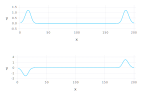

In [116]:
using Gadfly
vstack(plot(x=collect(1:KE), y = ex, Geom.line), plot(x=collect(1:KE), y = hy, Geom.line))

### Sinusoidal source

In [117]:
println("Enter frequency of sinusoidal source (in MHz): ");
freq_in = parse(Float64,readline(STDIN));
freq_in = freq_in* 10^6

Enter frequency of sinusoidal source (in MHz): 
STDIN> 440


4.4e8

In [118]:
dt = 0.005/(3*10^8)

1.6666666666666667e-11

In [119]:
ex_low_m1 = 0; ex_low_m2 = 0; ex_high_m1 = 0; ex_high_m2 = 0; ex = zeros(KE); hy = zeros(KE);
#main FDTD loop
T = 0; NSTEPS = 250; 
for n = 1:NSTEPS
    T = T + 1;
    for k = 2 : KE
        ex[k] = ex[k] +(0.5/eps)*(hy[k-1] - hy[k]);
    end
    pulse = sin(2*pi*freq_in*dt*T); #exp(-0.5*(abs2((t0-T)/spread)));
    ex[kc] = ex[kc] + pulse;
    
    #Absorbing boundary condidtions:
    ex[1] = ex_low_m2;
    ex_low_m2 = ex_low_m1;
    ex_low_m1 = ex[2];
    ex[KE] = ex_high_m2;
    ex_high_m2 = ex_high_m1;
    ex_high_m1 = ex[KE-1];
    
    for k = 1:KE-1
        hy[k] = hy[k] + 0.5 * ( ex[k] - ex[k+1]);
    end
end

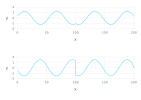

In [120]:
using Gadfly
vstack(plot(x=collect(1:KE), y = ex, Geom.line), plot(x=collect(1:KE), y = hy, Geom.line))

### Lossy medium

In [121]:
println("Enter conductivity: ");
sigma = parse(Float64,readline(STDIN));

Enter conductivity: 
STDIN> 4


In [123]:
#free space:
ca = fill(1, (1, KE));
cb = fill(0.5, (1, KE));
epsz = 8.85419/(10^12);

In [124]:
eaf = dt * sigma/(2*epsz*epsilon);
ca = fill(((1-eaf)/(1+eaf)), (1, KE));
cb = fill(0.5/(epsilon*(1 + eaf)), (1, KE));

In [127]:
ex_low_m1 = 0; ex_low_m2 = 0; ex_high_m1 = 0; ex_high_m2 = 0; ex = zeros(KE); hy = zeros(KE);
#main FDTD loop
T = 0; NSTEPS = 100; 
for n = 1:NSTEPS
    T = T + 1;
    for k = 2 : KE
        ex[k] = ca[k]*ex[k] + cb[k]*(hy[k-1] - hy[k]);
    end
    pulse = sin(2*pi*freq_in*dt*T); #exp(-0.5*(abs2((t0-T)/spread)));
    ex[kc] = ex[kc] + pulse;
    
    #Absorbing boundary condidtions:
    ex[1] = ex_low_m2;
    ex_low_m2 = ex_low_m1;
    ex_low_m1 = ex[2];
    ex[KE] = ex_high_m2;
    ex_high_m2 = ex_high_m1;
    ex_high_m1 = ex[KE-1];
    
    for k = 1:KE-1
        hy[k] = hy[k] + 0.5 * ( ex[k] - ex[k+1]);
    end
end

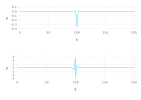

In [128]:
using Gadfly
vstack(plot(x=collect(1:KE), y = ex, Geom.line), plot(x=collect(1:KE), y = hy, Geom.line))